In [1]:
import pymc as pm

### Estimating distribution of water on Earth

$$\pi (\theta | \text{data}) \propto \pi(\theta) f(\text{data} | \theta)$$

$\pi (\theta) = \text{Uniform}(0, 1) = 1$

$f(\text{data} | \theta) = \text{Binomial}(n, \theta) \propto \theta^x(1- \theta)^{n - x}$


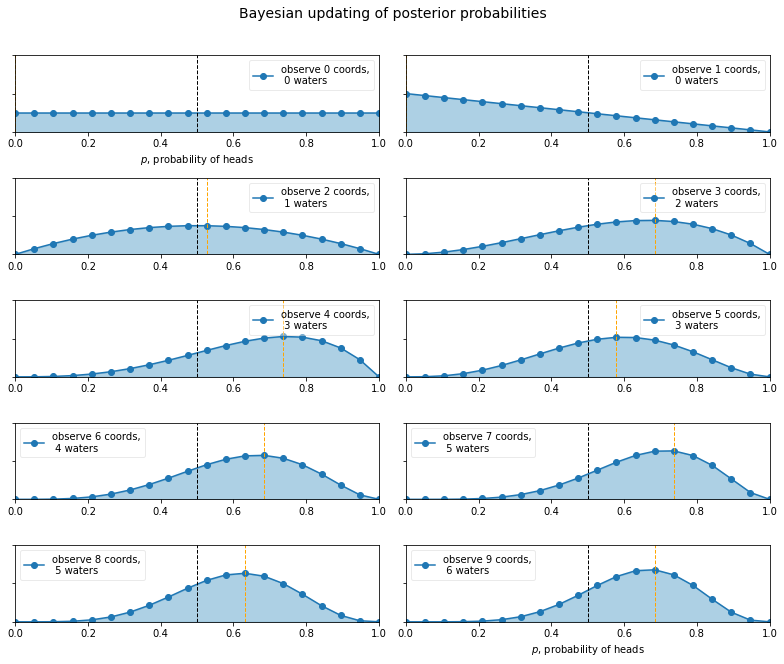

In [8]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 0: Land | 1: Water
data = []
data = stats.bernoulli.rvs(0.7, size=n_trials[-1])
x = np.linspace(0, 1, 20)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)//2, 2, k+1)
    plt.xlabel("$p$, probability of water") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    waters = data[:N].sum()
    y = dist.pdf(x, 1 + waters, 1 + N - waters)
    plt.plot(x, y, "o-", label="observe %d coords,\n %d waters" % (N, waters))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    
    ### Prior
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    
    ### Posterior
    plt.vlines(x[np.argmax(y)], 0, 4, color="orange", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()